In [5]:
#CSOE18 ML ASSIGNMENT
#ANEESH S 107120016
#VIJAYAKRISHNAN L 107120130
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [6]:
# importing or loading the dataset
df = pd.read_csv(r"F:\College\EEPE10\heart.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# distributing the dataset into two components X and Y
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
y

In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
y_train

In [ ]:
X_train

In [ ]:
#factor analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

In [ ]:
#Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df) 
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
# Scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

In [ ]:
X_train

In [ ]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

In [ ]:
!pip install mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
## Feature Engineering and Testing Model
from sklearn.model_selection import train_test_split, cross_validate


In [ ]:
def base_models_classification(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                    ("CART", DecisionTreeClassifier()),                                  
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")


base_models_classification(X,y)

In [ ]:
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)
print(model.score(X_test, y_test))

In [ ]:
# define the model
model = LogisticRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

In [ ]:
# define the model
model = KNeighborsClassifier()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

In [ ]:
# define the model
model = DecisionTreeClassifier()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the test set result using
#predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [ ]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
df
.

SyntaxError: invalid syntax (Temp/ipykernel_19304/3966265560.py, line 2)

In [12]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [1]:
x=df.iloc[:,3:8:4].values^T


NameError: name 'df' is not defined

In [58]:
x

array([[145, 150],
       [130, 187],
       [130, 172],
       [120, 178],
       [120, 163],
       [140, 148],
       [140, 153],
       [120, 173],
       [172, 162],
       [150, 174],
       [140, 160],
       [130, 139],
       [130, 171],
       [110, 144],
       [150, 162],
       [120, 158],
       [120, 172],
       [150, 114],
       [150, 171],
       [140, 151],
       [135, 161],
       [130, 179],
       [140, 178],
       [150, 137],
       [140, 178],
       [160, 162],
       [150, 157],
       [110, 123],
       [140, 157],
       [130, 152],
       [105, 168],
       [120, 140],
       [130, 188],
       [125, 152],
       [125, 125],
       [142, 160],
       [135, 170],
       [150, 165],
       [155, 148],
       [160, 151],
       [140, 142],
       [130, 180],
       [104, 148],
       [130, 143],
       [140, 182],
       [120, 172],
       [140, 180],
       [138, 156],
       [128, 115],
       [138, 160],
       [130, 149],
       [120, 151],
       [130,

In [59]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [60]:
wcss

[251334.3234323434,
 145088.76244283016,
 102843.86183574879,
 78503.5637753176,
 65422.646423625236,
 54334.38676060151,
 46288.41239539705,
 41284.28873679139,
 37204.670320487916,
 33276.31278788937]

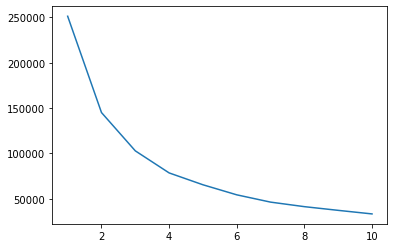

In [61]:
plt.plot(range(1,11),wcss)

In [62]:
kmeans=KMeans(n_clusters=4,init='k-means++')
y_kmeans=kmeans.fit_predict(x)

In [63]:
y_kmeans

array([3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 2, 0, 2, 3, 0, 0, 1, 3, 3, 0, 0,
       0, 3, 0, 3, 3, 2, 3, 2, 0, 2, 0, 2, 1, 3, 0, 3, 3, 3, 3, 0, 2, 2,
       0, 0, 0, 3, 1, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 3, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 2, 3, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 1, 3, 2, 0, 0, 3, 3, 0, 0, 0, 1, 3, 3, 0, 2,
       3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 3, 0,
       0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 3, 2, 3, 0, 2, 3, 2, 3, 3,
       3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 3, 2, 0, 0, 0, 2, 1,
       0, 3, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 3, 2, 2, 2, 1, 3, 3, 3, 3, 0,
       1, 2, 0, 2, 1, 3, 3, 0, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 1, 2,
       3, 1, 0, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 1, 0, 0, 0, 0, 0, 1, 3,
       1, 1, 1, 0, 2, 1, 3, 3, 1, 2, 1, 2, 1, 3, 2, 1, 3, 0, 3, 0, 1, 0,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 3, 1, 1, 0, 2, 3, 3, 1,
       0, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 3,

In [64]:
pd.concat([df,pd.DataFrame(y_kmeans)],axis=1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


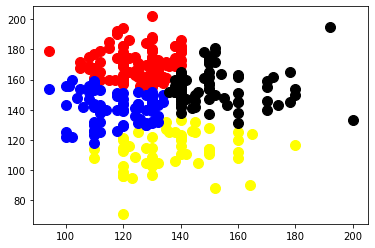

In [69]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100, c='red') 
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100, c='yellow')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100, c='blue') 
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100, c='black') 